***
***
***

# Assignment | Apprentice Chef <br>
<strong>Machine Learning</strong> <br>
Thiago Marcondes <br>
Prof.: Chase Kusterer <br>
Hult International Business School 

***
***

## Agenda

1. Introduction
2. Preparing the data
3. Analysis
4. Model
5. Conclusion

***
<h3> Introduction </h3>

The mission of this analysis is to create a higher understanding of the Apprentice Chef customer base considering their KPIs. To achieve that our focus will be, first, understanding and cleaning the data, making sure that the dataset is ready to be analyzed. Secondly, diving deeper into the KPIs to see which impact most on the revenue. This point will be especially important to give us business insights and shed light on the indicators that the company may improve their practice. Finally, we will create a model to estimate the revenue of future customers considering their behavior.

***
<h3> Preparing the data </h3>

In [3]:
# Importing necessary packages: 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rand
import gender_guesser.detector as gender
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model

In [4]:
# Reading external file: 
file = 'Apprentice_Chef_Dataset.xlsx'
app_chef = pd.read_excel(file)

In [5]:
# Changing column names: 
# Changing variable names
app_chef = app_chef.rename(columns={'REVENUE'                     :'revenue',
                                    'CROSS_SELL_SUCCESS'          :'cross_sell',
                                    'NAME'                        :'name',
                                    'EMAIL'                       :'email',
                                    'FIRST_NAME'                  :'first_name',
                                    'FAMILY_NAME'                 :'family_name',
                                    'TOTAL_MEALS_ORDERED'         :'total_meals',
                                    'UNIQUE_MEALS_PURCH'          :'unique_meals',
                                    'CONTACTS_W_CUSTOMER_SERVICE' :'contact_cust_serv',
                                    'PRODUCT_CATEGORIES_VIEWED'   :'prod_cat_view',
                                    'AVG_TIME_PER_SITE_VISIT'     :'avg_time_vis',
                                    'MOBILE_NUMBER'               :'mob_number',
                                    'CANCELLATIONS_BEFORE_NOON'   :'early_cancel',
                                    'CANCELLATIONS_AFTER_NOON'    :'late_cancel',
                                    'TASTES_AND_PREFERENCES'      :'tastes_pref',
                                    'PC_LOGINS'                   :'pc_logins',
                                    'MOBILE_LOGINS'               :'mob_logins',
                                    'WEEKLY_PLAN'                 :'week_plan',
                                    'EARLY_DELIVERIES'            :'early_deliv',
                                    'LATE_DELIVERIES'             :'late_deliv',
                                    'PACKAGE_LOCKER'              :'pack_lock',
                                    'REFRIGERATED_LOCKER'         :'ref_lock',
                                    'FOLLOWED_RECOMMENDATIONS_PCT':'follow_rec_pct',
                                    'AVG_PREP_VID_TIME'           :'avg_prep_time',
                                    'LARGEST_ORDER_SIZE'          :'larger_order',
                                    'MASTER_CLASSES_ATTENDED'     :'master_classes',
                                    'MEDIAN_MEAL_RATING'          :'med_meal_rate',
                                    'AVG_CLICKS_PER_VISIT'        :'avg_clicks',
                                    'TOTAL_PHOTOS_VIEWED'         :'total_photos'})

In [6]:
# Checking missing values: 
app_chef.isnull().sum()

revenue               0
cross_sell            0
name                  0
email                 0
first_name            0
family_name          47
total_meals           0
unique_meals          0
contact_cust_serv     0
prod_cat_view         0
avg_time_vis          0
mob_number            0
early_cancel          0
late_cancel           0
tastes_pref           0
pc_logins             0
mob_logins            0
week_plan             0
early_deliv           0
late_deliv            0
pack_lock             0
ref_lock              0
follow_rec_pct        0
avg_prep_time         0
larger_order          0
master_classes        0
med_meal_rate         0
avg_clicks            0
total_photos          0
dtype: int64

In [7]:
# Filling missing values: 
# Creating loop:
for c in app_chef:
    if app_chef[c].isnull().astype(int).sum() > 0:
        app_chef['m_'+c] = app_chef[c].isnull().astype(int)

# Imputing value
app_chef['family_name'] = app_chef['family_name'].fillna('Unknown')

# Confirming if we don't have any other missing value
app_chef.isnull().any().sum()

0

<strong> New variables </strong><br>

Creating new variables will be important in the future to give further information about our customers to the system. Important KPIs that will be helpful to create a better model, and they may also give us interesting business insights.

Below, all the new variables:

<strong> 1. Average ticket per order </strong><br>
    Getting a better understand on how much each customer are used to spend with the company
    <br><br>
<strong> 2. Average contacts per order </strong><br>
    Getting an idea on how many contacts this customer had with our customer service per order
    <br><br> 
<strong> 3. Percentage of orders delivered late/early </strong><br>
    Having a better understand on the delivery performance
    <br><br>
<strong> 4. Share of total revenues/meals </strong><br>
    Useful if we need to get a proportional result, especially considering categorical variables
    <br><br>
<strong> 5. Email domain group </strong><br>
    Understanding if the customer logged with a personal or business email
    <br><br>
<strong> 6. Rating category </strong><br>
    Classifying rates in three different groups: Negative, Neutral, and Positive
    <br><br>
<strong> 7. Customer service status </strong><br>
    Classifying customer considering the amount of contacts with customer service per order: 'Satisfied' or 'Unhappy'. <br><br>
    This latest classification we decided to create after looking at the scatterplot that shows the relationship among the     variables Average Contact Customer Service and Revenue

In [8]:
# Creating new variables (continuous): 

# Average ticket per order:
app_chef['avg_tckt_order'] = app_chef['revenue']/app_chef['total_meals']
app_chef['avg_tckt_order'] = app_chef['avg_tckt_order'].round(2)

# Average contacts per order:
app_chef['avg_contact_cust_serv'] = app_chef['contact_cust_serv']/app_chef['total_meals']
app_chef['avg_contact_cust_serv'] = app_chef['avg_contact_cust_serv'].round(2)

# Percentage of orders delivered late:
app_chef['pct_late_deliv'] = app_chef['late_deliv']/app_chef['total_meals']
app_chef['pct_late_deliv'] = app_chef['pct_late_deliv'].round(2)

# Percentage of orders delivered early:
app_chef['pct_early_deliv'] = app_chef['early_deliv']/app_chef['total_meals']
app_chef['pct_early_deliv'] = app_chef['pct_early_deliv'].round(2)

# Share of total revenue:
app_chef['share_revenue'] = app_chef['revenue']/app_chef['revenue'].sum()
app_chef['share_revenue'] = app_chef['share_revenue'].round(4)

# Share of total meals:
app_chef['share_total_meals'] = app_chef['total_meals']/app_chef['total_meals'].sum()
app_chef['share_total_meals'] = app_chef['share_total_meals'].round(4)

# Checking dataset:
app_chef.head(n=5)

,revenue,cross_sell,name,email,first_name,family_name,total_meals,unique_meals,contact_cust_serv,prod_cat_view,...,med_meal_rate,avg_clicks,total_photos,m_family_name,avg_tckt_order,avg_contact_cust_serv,pct_late_deliv,pct_early_deliv,share_revenue,share_total_meals
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,3,11,0,0,15.93,0.06,0.02,0.00,0.0005,0.0008
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,3,13,90,0,33.98,0.14,0.09,0.00,0.0004,0.0003
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,3,12,0,0,67.70,0.13,0.00,0.00,0.0006,0.0003
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,3,13,0,0,21.67,0.11,0.05,0.07,0.0004,0.0005
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,3,13,253,0,29.58,0.09,0.06,0.00,0.0005,0.0004


In [9]:
# Creating new variables (categorical): 

## 1st: Email domain group
# Splitting email to get domain

# Creating empty list to fill it later
email_lst = []

# Creating loop to split email address:
for index, col in app_chef.iterrows():
    split_email = app_chef.loc[index, 'email'].split(sep = '@')
    email_lst.append(split_email)

# Filling list and converting into a dataframe:
email_df = pd.DataFrame(email_lst)

# Changing column names:
email_df.columns = ['name','email']

# Looping again to get only the name of the domain (removing '.com'):
email_lst_2 = []
for index, col in email_df.iterrows():
    split_email = email_df.loc[index, 'email'].split(sep = '.')
    email_lst_2.append(split_email)

# Filling list, converting into a DataFrame and changing column names:
email_df_2 = pd.DataFrame(email_lst_2)
email_df_2.columns = ['domain','.com']

# Including column in our main dataset:
app_chef = pd.concat([app_chef, email_df_2['domain']],
                   axis = 1)

# Grouping email domain types:
personal_email_domains = ['gmail', 'protonmail','yahoo', 'msn',
                         'aol','passport','hotmail','live','me']
business_email_domains  = ['amex','merck','mcdonalds','jnj','cocacola','apple',
                          'nike','ibm','ge','dupont','chevron','microsoft','travelers',
                          'unitedhealth','exxon','boeing','caterpillar','mmm','verizon','pg',
                          'disney','walmart','visa','pfizer','jpmorgan','cisco','goldmansacs',
                          'unitedtech','homedepot','intel']

# Looping one more time to massively classify the domains:
email_group = []
for group in app_chef['domain']:
        if group in personal_email_domains:
            email_group.append('personal')
            
        elif group in business_email_domains:
            email_group.append('business')
            
        else:
            print('Unknown')

# Concatenating with our original DataFrame:
app_chef['domain_group'] = pd.Series(email_group)

## 2nd: Rating category

# Negative ratings:
app_chef['rating_category'] = 0
rate_1 = app_chef.loc[0:,'rating_category'][app_chef['med_meal_rate'] == 1]

app_chef['rating_category'].replace(to_replace = rate_1,
                                value      = 'Negative',
                                inplace    = True)
rate_2 = app_chef.loc[0:,'rating_category'][app_chef['med_meal_rate'] == 2]

app_chef['rating_category'].replace(to_replace = rate_2,
                                value      = 'Negative',
                                inplace    = True)

# Neutral ratings:
rate_3 = app_chef.loc[0:,'rating_category'][app_chef['med_meal_rate'] == 3]
app_chef['rating_category'].replace(to_replace = rate_3,
                                value      = 'Neutral',
                                inplace    = True)

# Positive ratings:
rate_4 = app_chef.loc[0:,'rating_category'][app_chef['med_meal_rate'] == 4]
app_chef['rating_category'].replace(to_replace = rate_4,
                                value      = 'Positive',
                                inplace    = True)

rate_5 = app_chef.loc[0:,'rating_category'][app_chef['med_meal_rate'] == 5]

app_chef['rating_category'].replace(to_replace = rate_5,
                                value      = 'Positive',
                                inplace    = True)
## 3rd: Critical customer (too many contacts on customer service):
app_chef['cust_serv_status'] = 0
good_cust_serv = app_chef.loc[0:,'cust_serv_status'][app_chef['avg_contact_cust_serv'] <= 0.5]
app_chef['cust_serv_status'].replace(to_replace = good_cust_serv,
                                value      = 'Satisfied',
                                inplace    = True)

bad_cust_serv = app_chef.loc[0:,'cust_serv_status'][app_chef['avg_contact_cust_serv'] > 0.5]

app_chef['cust_serv_status'].replace(to_replace = bad_cust_serv,
                                value      = 'Unhappy',
                                inplace    = True)


# Printing values counts per categorical variable:

print(f"""
Domain Group
------
{app_chef['domain_group'].value_counts().sort_index()}

Rating Category
------
{app_chef['rating_category'].value_counts().sort_index()}

Customer Service Status
------
{app_chef['cust_serv_status'].value_counts().sort_index()}

""")


Domain Group
------
business     696
personal    1250
Name: domain_group, dtype: int64

Rating Category
------
Negative     586
Neutral     1087
Positive     273
Name: rating_category, dtype: int64

Customer Service Status
------
Satisfied    1730
Unhappy       216
Name: cust_serv_status, dtype: int64




***
<h3> Analysis </h3>

In [10]:
# Defining variables types: 

"""
# CONTINUOUS OR INTERVAL
REVENUE                         
AVG_TIME_PER_SITE_VISIT 
FOLLOWED_RECOMMENDATIONS_PCT    
AVG_PREP_VID_TIME
MEDIAN_MEAL_RATING

# BINARY
CROSS_SELL_SUCCESS              
TASTES_AND_PREFERENCES
PACKAGE_LOCKER                  
REFRIGERATED_LOCKER             

# COUNT
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH              
CONTACTS_W_CUSTOMER_SERVICE     
PRODUCT_CATEGORIES_VIEWED       
CANCELLATIONS_BEFORE_NOON       
CANCELLATIONS_AFTER_NOON        
PC_LOGINS                       
MOBILE_LOGINS     
WEEKLY_PLAN 
EARLY_DELIVERIES                
LATE_DELIVERIES     
LARGEST_ORDER_SIZE  
MASTER_CLASSES_ATTENDED         
AVG_CLICKS_PER_VISIT            
TOTAL_PHOTOS_VIEWED             

# CATEGORICAL
RATING_CATEGORY
DOMAIN_GROUP

# DISCRETE
NAME             
EMAIL                           
FIRST_NAME                 
MOBILE_NUMBER                   
FAMILY_NAME
DOMAIN
"""

'\n# CONTINUOUS OR INTERVAL\nREVENUE                         \nAVG_TIME_PER_SITE_VISIT \nFOLLOWED_RECOMMENDATIONS_PCT    \nAVG_PREP_VID_TIME\nMEDIAN_MEAL_RATING\n\n# BINARY\nCROSS_SELL_SUCCESS              \nTASTES_AND_PREFERENCES\nPACKAGE_LOCKER                  \nREFRIGERATED_LOCKER             \n\n# COUNT\nTOTAL_MEALS_ORDERED\nUNIQUE_MEALS_PURCH              \nCONTACTS_W_CUSTOMER_SERVICE     \nPRODUCT_CATEGORIES_VIEWED       \nCANCELLATIONS_BEFORE_NOON       \nCANCELLATIONS_AFTER_NOON        \nPC_LOGINS                       \nMOBILE_LOGINS     \nWEEKLY_PLAN \nEARLY_DELIVERIES                \nLATE_DELIVERIES     \nLARGEST_ORDER_SIZE  \nMASTER_CLASSES_ATTENDED         \nAVG_CLICKS_PER_VISIT            \nTOTAL_PHOTOS_VIEWED             \n\n# CATEGORICAL\nRATING_CATEGORY\nDOMAIN_GROUP\n\n# DISCRETE\nNAME             \nEMAIL                           \nFIRST_NAME                 \nMOBILE_NUMBER                   \nFAMILY_NAME\nDOMAIN\n'

In [11]:
# Checking variables per quantile: 
app_chef.loc[:, :].quantile([0.20,
                         0.40,
                         0.60,
                         0.80,
                         1.00])

,revenue,cross_sell,total_meals,unique_meals,contact_cust_serv,prod_cat_view,avg_time_vis,mob_number,early_cancel,late_cancel,...,med_meal_rate,avg_clicks,total_photos,m_family_name,avg_tckt_order,avg_contact_cust_serv,pct_late_deliv,pct_early_deliv,share_revenue,share_total_meals
0.2,1285.00,0.0,35.0,3.0,5.0,2.0,61.58,1.0,0.0,0.0,...,2.0,12.0,0.0,0.0,19.83,0.06,0.01,0.00,0.0003,0.0002
0.4,1558.00,1.0,51.0,4.0,6.0,4.0,86.51,1.0,1.0,0.0,...,3.0,13.0,0.0,0.0,29.52,0.09,0.03,0.00,0.0004,0.0004
0.6,1910.00,1.0,71.0,6.0,7.0,6.0,102.62,1.0,1.0,0.0,...,3.0,14.0,28.0,0.0,38.18,0.12,0.05,0.00,0.0005,0.0005
0.8,2895.00,1.0,106.0,7.0,9.0,9.0,123.80,1.0,2.0,0.0,...,3.0,16.0,210.0,0.0,47.92,0.17,0.10,0.05,0.0007,0.0007
1.0,8793.75,1.0,493.0,19.0,18.0,10.0,1645.60,1.0,13.0,3.0,...,5.0,19.0,1600.0,1.0,153.12,1.00,1.25,0.75,0.0021,0.0034


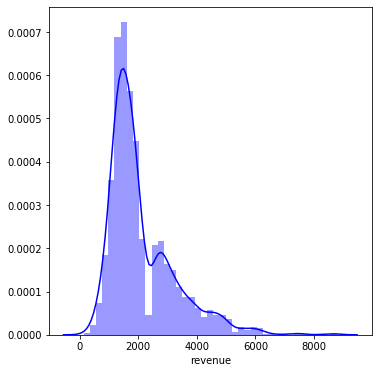

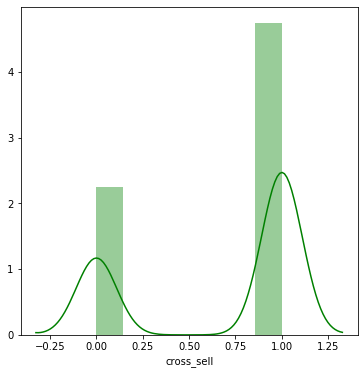

Unable to plot a Histogram
Unable to plot a Histogram
Unable to plot a Histogram
Unable to plot a Histogram


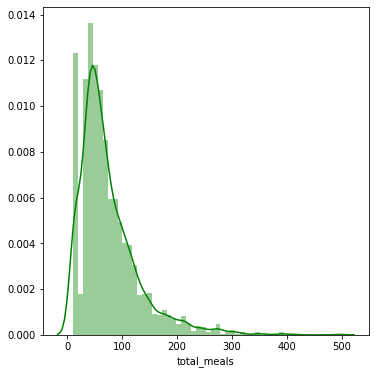

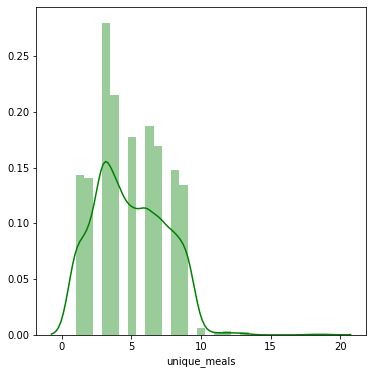

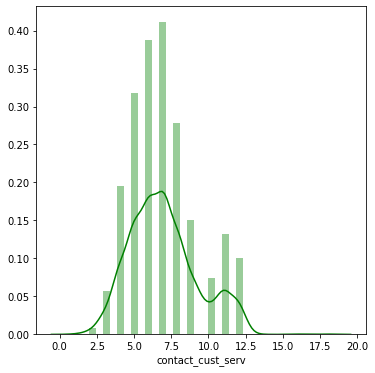

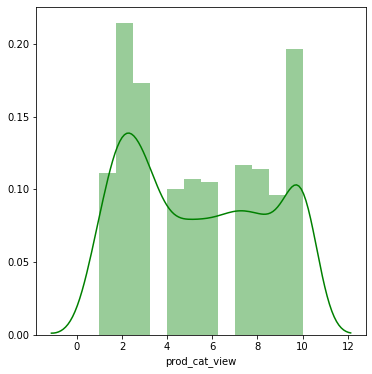

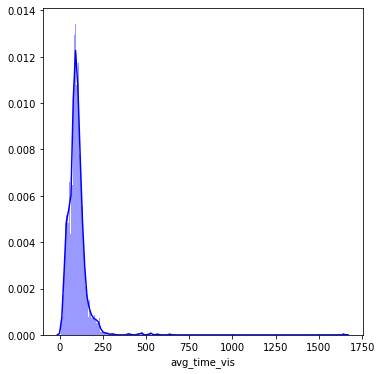

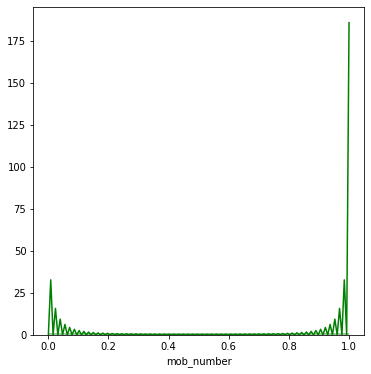

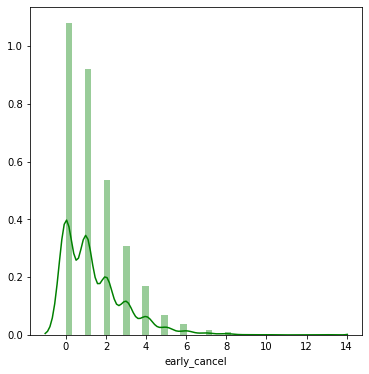

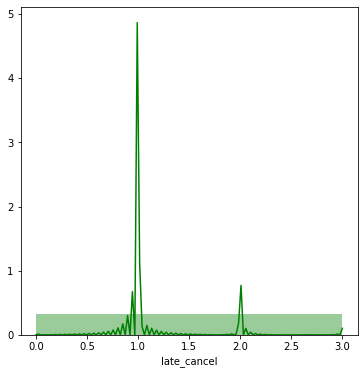

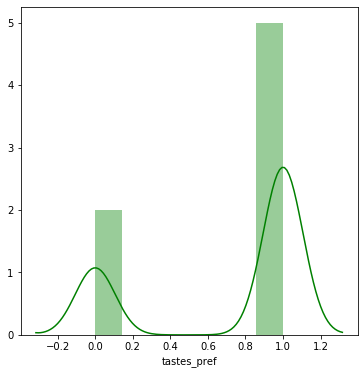

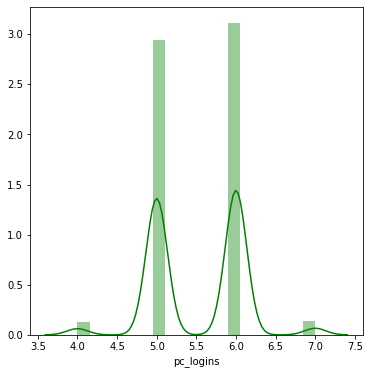

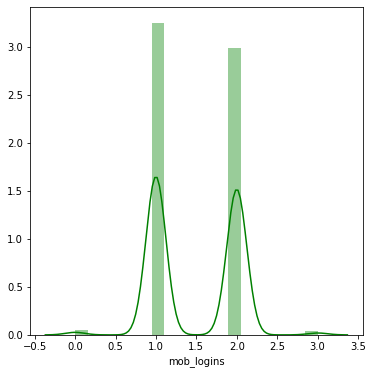

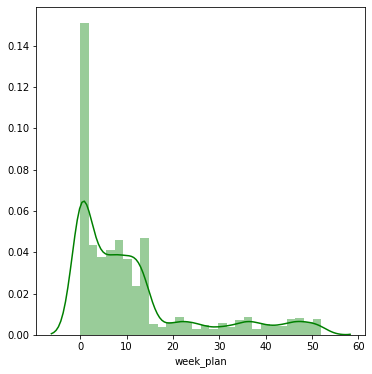

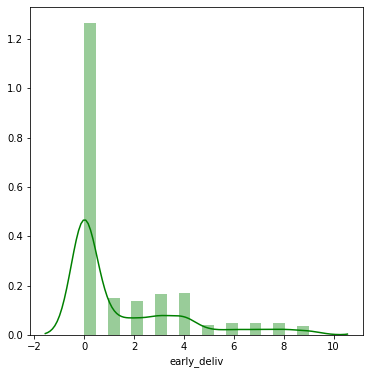

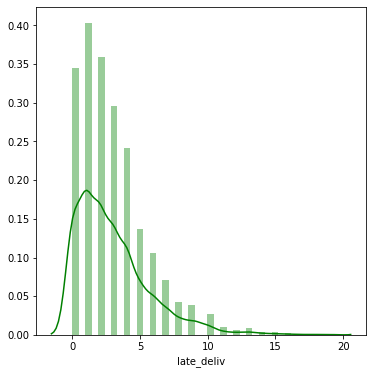

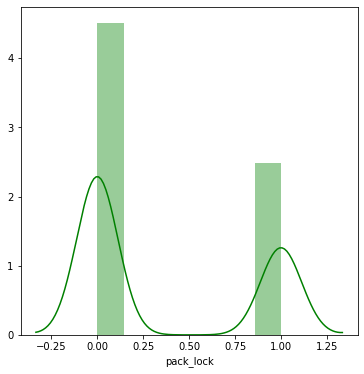

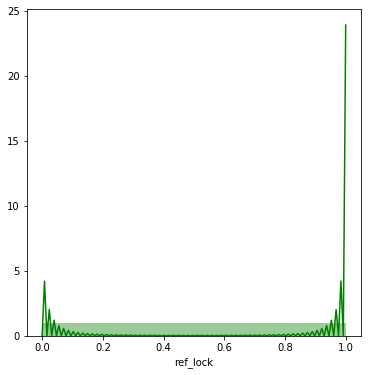

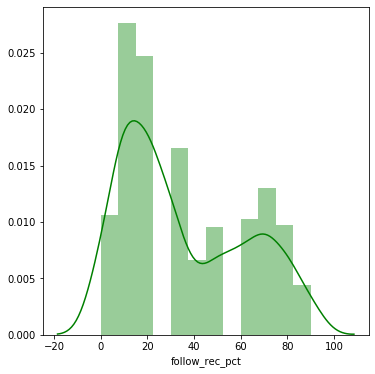

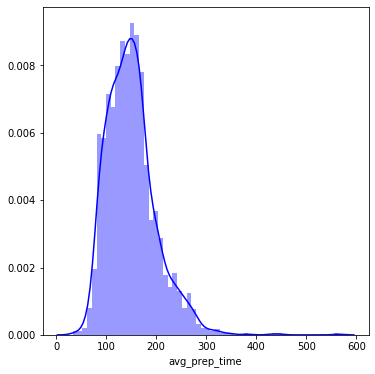

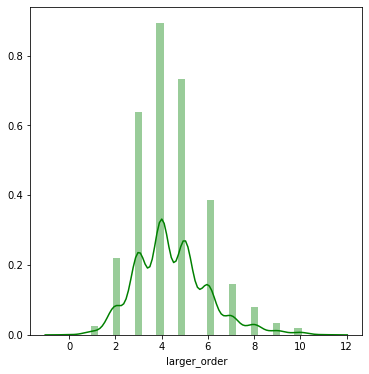

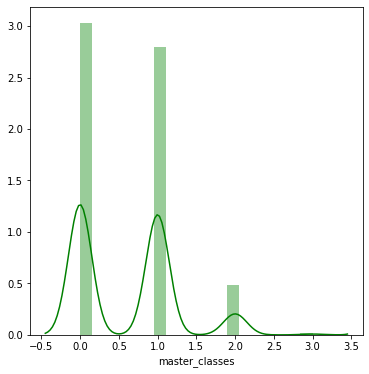

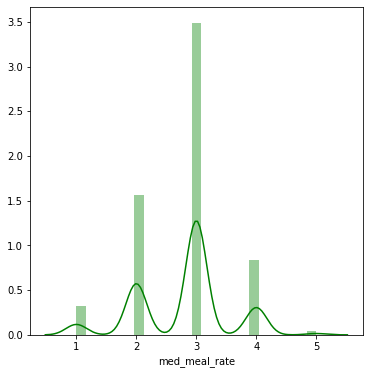

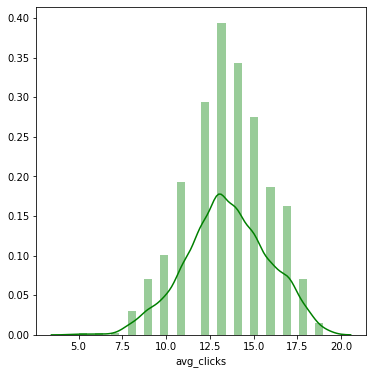

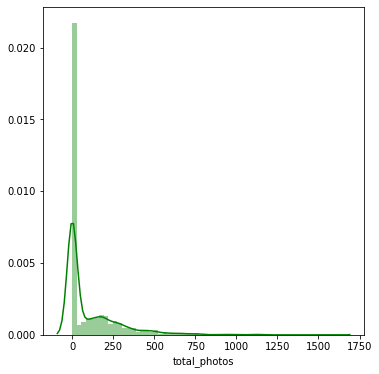

Unable to plot a Histogram


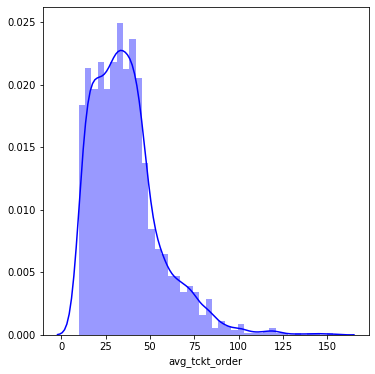

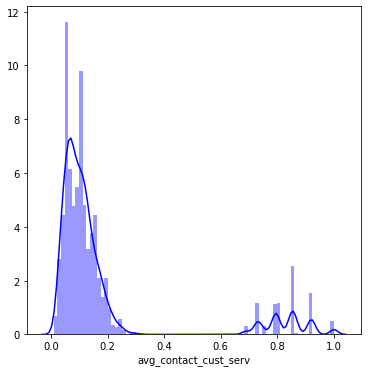

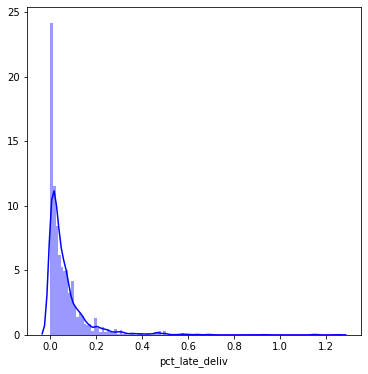

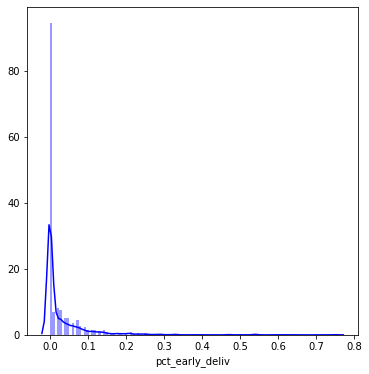

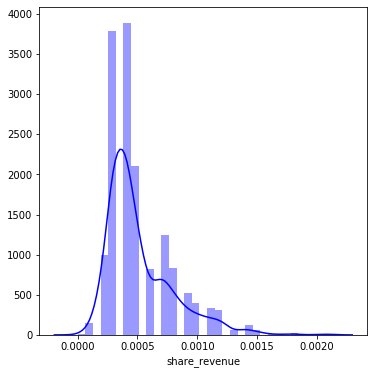

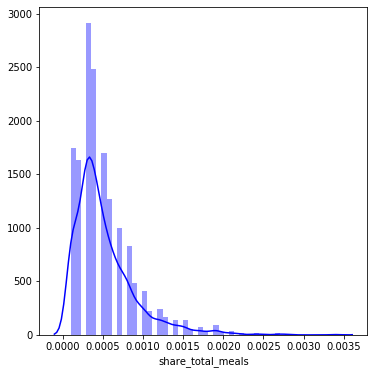

Unable to plot a Histogram
Unable to plot a Histogram
Unable to plot a Histogram
Unable to plot a Histogram


In [12]:
# Plotting histogram: 
for plot in app_chef:
    if app_chef[plot].dtypes == 'int64':
        fig, ax = plt.subplots(figsize = (10, 10))
        plt.subplot(2, 2, 1)
        sns.distplot(app_chef[plot],
                 bins  = 'fd',
                 color = 'g')
        plt.xlabel(plot)
        plt.tight_layout()
        plt.show()
    elif app_chef[plot].dtypes == 'float64':
        fig, ax = plt.subplots(figsize = (10, 10)) #makes plot bigger
        plt.subplot(2, 2, 1)
        sns.distplot(app_chef[plot],
                 bins  = 'fd',
                 color = 'b')
        plt.xlabel(plot)
        plt.tight_layout()
        plt.show()
    else:
        print('Unable to plot a Histogram')

In [13]:
# Setting outlier thresholds: 

# Explanatory variables:
avg_time_hi              = 250
avg_prep_lo              = 70
avg_prep_hi              = 280
total_meals_hi           = 250
unique_meals_hi          = 10
cont_cust_serv_lo        = 2.5
cont_cust_serv_hi        = 12.5
canc_bef_noon_hi         = 6
late_deliv_hi            = 10
larg_order_lo            = 2
larg_order_hi            = 8
avg_clicks_lo            = 8
avg_clicks_hi            = 18
total_photos_hi          = 500
avg_tckt_order_hi        = 80
avg_contact_cust_serv_hi = 0.3
pct_late_deliv_hi        = 0.3
pct_early_deliv_hi       = 0.15
share_total_meals_hi     = 0.0018

# Average visit time:
app_chef['out_avg_time_hi'] = 0
condition_hi = app_chef.loc[0:,'out_avg_time_hi'][app_chef['avg_time_vis'] > avg_time_hi]

app_chef['out_avg_time_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Average preparation time:
## Low:
app_chef['out_avg_prep_lo'] = 0
condition_hi = app_chef.loc[0:,'out_avg_prep_lo'][app_chef['avg_prep_time'] < avg_prep_lo]

app_chef['out_avg_prep_lo'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

## High
app_chef['out_avg_prep_hi'] = 0
condition_hi = app_chef.loc[0:,'out_avg_prep_hi'][app_chef['avg_prep_time'] > avg_prep_hi]

app_chef['out_avg_prep_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Total Meals:
app_chef['out_total_meals_hi'] = 0
condition_hi = app_chef.loc[0:,'out_total_meals_hi'][app_chef['total_meals'] > total_meals_hi]

app_chef['out_total_meals_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Unique Meals:
app_chef['out_unique_meals_hi'] = 0
condition_hi = app_chef.loc[0:,'out_unique_meals_hi'][app_chef['unique_meals'] > unique_meals_hi]

app_chef['out_unique_meals_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Contact customer service:
## High
app_chef['out_cont_cust_serv_lo'] = 0
condition_hi = app_chef.loc[0:,'out_cont_cust_serv_lo'][app_chef['contact_cust_serv'] < cont_cust_serv_lo]

app_chef['out_cont_cust_serv_lo'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

## Low
app_chef['out_cont_cust_serv_hi'] = 0
condition_hi = app_chef.loc[0:,'out_cont_cust_serv_hi'][app_chef['contact_cust_serv'] > cont_cust_serv_hi]

app_chef['out_cont_cust_serv_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Cancelation before noon:
app_chef['out_canc_bef_noon_hi'] = 0
condition_hi = app_chef.loc[0:,'out_canc_bef_noon_hi'][app_chef['late_cancel'] > canc_bef_noon_hi]

app_chef['out_canc_bef_noon_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Late Deliveries:
app_chef['out_late_deliv_hi'] = 0
condition_hi = app_chef.loc[0:,'out_late_deliv_hi'][app_chef['late_deliv'] > late_deliv_hi]

app_chef['out_late_deliv_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Largest order per customer:
## Low
app_chef['out_larg_order_lo'] = 0
condition_hi = app_chef.loc[0:,'out_larg_order_lo'][app_chef['larger_order'] < larg_order_lo]

app_chef['out_larg_order_lo'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

## High
app_chef['out_larg_order_hi'] = 0
condition_hi = app_chef.loc[0:,'out_larg_order_hi'][app_chef['larger_order'] > larg_order_hi]

app_chef['out_larg_order_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Average clicks:
## Low
app_chef['out_avg_clicks_lo'] = 0
condition_hi = app_chef.loc[0:,'out_avg_clicks_lo'][app_chef['avg_clicks'] < avg_clicks_lo]

app_chef['out_avg_clicks_lo'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)
## High
app_chef['out_avg_clicks_hi'] = 0
condition_hi = app_chef.loc[0:,'out_avg_clicks_hi'][app_chef['avg_clicks'] > avg_clicks_hi]

app_chef['out_avg_clicks_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Total Photos:
app_chef['out_total_photos_hi'] = 0
condition_hi = app_chef.loc[0:,'out_total_photos_hi'][app_chef['total_photos'] > total_photos_hi]

app_chef['out_total_photos_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Late Deliveries (% of total):
app_chef['out_pct_late_deliv_hi'] = 0
condition_hi = app_chef.loc[0:,'out_pct_late_deliv_hi'][app_chef['pct_late_deliv'] > pct_late_deliv_hi]

app_chef['out_pct_late_deliv_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Early Deliveries (% of total):
app_chef['out_pct_early_deliv_hi'] = 0
condition_hi = app_chef.loc[0:,'out_pct_early_deliv_hi'][app_chef['pct_early_deliv'] > pct_early_deliv_hi]

app_chef['out_pct_early_deliv_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Total meals:
app_chef['out_share_total_meals_hi'] = 0
condition_hi = app_chef.loc[0:,'out_share_total_meals_hi'][app_chef['share_total_meals'] > share_total_meals_hi]

app_chef['out_share_total_meals_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Response variable:
revenue_hi       = 5000
share_revenue_hi = 0.0013

# Revenue:
app_chef['out_revenue_hi'] = 0
condition_hi = app_chef.loc[0:,'out_revenue_hi'][app_chef['revenue'] > revenue_hi]

app_chef['out_revenue_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Share revenue:
app_chef['out_share_revenue_hi'] = 0
condition_hi = app_chef.loc[0:,'out_share_revenue_hi'][app_chef['share_revenue'] > share_revenue_hi]

app_chef['out_share_revenue_hi'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

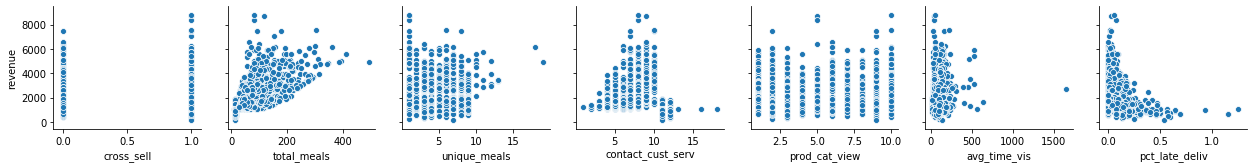

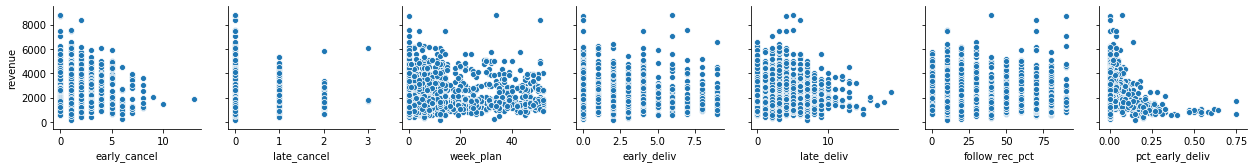

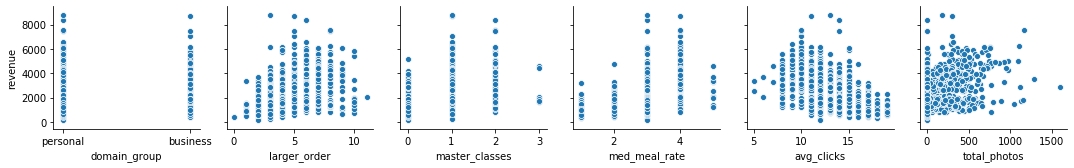

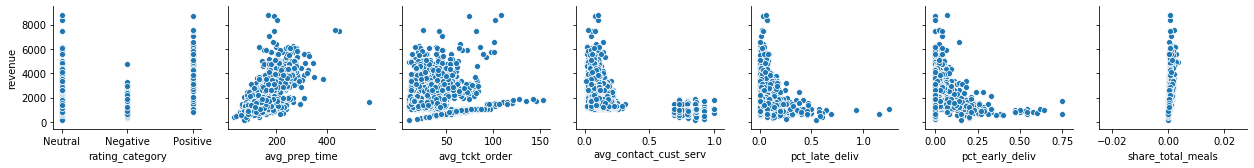

In [14]:
# Plotting scatterplots comparing variables with revenue: 
sns.pairplot(data = app_chef,
             x_vars = ['cross_sell',
                       'total_meals',
                       'unique_meals',
                       'contact_cust_serv',
                       'prod_cat_view',
                       'avg_time_vis',
                       'pct_late_deliv'],
             y_vars = ['revenue'],
             palette = 'plasma')
plt.show()

sns.pairplot(data = app_chef,
             x_vars = ['early_cancel',
                       'late_cancel',
                       'week_plan',
                       'early_deliv',
                       'late_deliv',
                       'follow_rec_pct',
                       'pct_early_deliv'],
             y_vars = ['revenue'],
             palette = 'plasma')
plt.show()

sns.pairplot(data = app_chef,
             x_vars = ['domain_group',
                       'larger_order',
                       'master_classes',
                       'med_meal_rate',
                       'avg_clicks',
                       'total_photos'],
             y_vars = ['revenue'],
             palette = 'plasma')
plt.show()

sns.pairplot(data = app_chef,
             x_vars = ['rating_category',
                       'avg_prep_time',
                       'avg_tckt_order',
                       'avg_contact_cust_serv',
                       'pct_late_deliv',
                       'pct_early_deliv',
                       'share_total_meals'],
             y_vars = ['revenue'],
             palette = 'plasma')
plt.show()
print("""
""")

In [15]:
# Setting scatterplot thresholds: 
thr_total_meals       = 300
thr_unique_meals      = 12
thr_contact_cust_serv = 11
thr_avg_time_vis      = 250
thr_early_cancel      = 8
thr_late_cancel       = 2
thr_late_deliv        = 13
thr_avg_prep_time     = 380
thr_total_photos      = 800
thr_avg_tckt_order    = 100
thr_pct_late_deliv    = 0.5
thr_pct_early_deliv   = 0.4

# Total meals:
app_chef['thr_total_meals'] = 0
condition_hi = app_chef.loc[0:,'thr_total_meals'][app_chef['total_meals'] > thr_total_meals]

app_chef['thr_total_meals'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Unique meals:
app_chef['thr_unique_meals'] = 0
condition_hi = app_chef.loc[0:,'thr_unique_meals'][app_chef['unique_meals'] > thr_unique_meals]

app_chef['thr_unique_meals'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Contact customer service:
app_chef['thr_contact_cust_serv'] = 0
condition_hi = app_chef.loc[0:,'thr_contact_cust_serv'][app_chef['contact_cust_serv'] > thr_contact_cust_serv]

app_chef['thr_contact_cust_serv'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Average time per visit:
app_chef['thr_avg_time_vis'] = 0
condition_hi = app_chef.loc[0:,'thr_avg_time_vis'][app_chef['avg_time_vis'] > thr_avg_time_vis]

app_chef['thr_avg_time_vis'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Cancelation before noon:
app_chef['thr_early_cancel'] = 0
condition_hi = app_chef.loc[0:,'thr_early_cancel'][app_chef['early_cancel'] > thr_early_cancel]

app_chef['thr_early_cancel'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Cancelation after noon:
app_chef['thr_late_cancel'] = 0
condition_hi = app_chef.loc[0:,'thr_late_cancel'][app_chef['late_cancel'] > thr_late_cancel]

app_chef['thr_late_cancel'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Late deliveries:
app_chef['thr_late_deliv'] = 0
condition_hi = app_chef.loc[0:,'thr_late_deliv'][app_chef['late_deliv'] > thr_late_deliv]

app_chef['thr_late_deliv'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Average preparation time:
app_chef['thr_avg_prep_time'] = 0
condition_hi = app_chef.loc[0:,'thr_avg_prep_time'][app_chef['avg_prep_time'] > thr_avg_prep_time]

app_chef['thr_avg_prep_time'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Total photos:
app_chef['thr_total_photos'] = 0
condition_hi = app_chef.loc[0:,'thr_total_photos'][app_chef['total_photos'] > thr_total_photos]

app_chef['thr_total_photos'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Average ticket per order:
app_chef['thr_avg_tckt_order'] = 0
condition_hi = app_chef.loc[0:,'thr_avg_tckt_order'][app_chef['avg_tckt_order'] > thr_avg_tckt_order]

app_chef['thr_avg_tckt_order'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Late deliveries (% of total):
app_chef['thr_pct_late_deliv'] = 0
condition_hi = app_chef.loc[0:,'thr_pct_late_deliv'][app_chef['pct_late_deliv'] > thr_pct_late_deliv]

app_chef['thr_pct_late_deliv'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Early delivieries (% of total)
app_chef['thr_pct_early_deliv'] = 0
condition_hi = app_chef.loc[0:,'thr_pct_early_deliv'][app_chef['pct_early_deliv'] > thr_pct_early_deliv]

app_chef['thr_pct_early_deliv'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

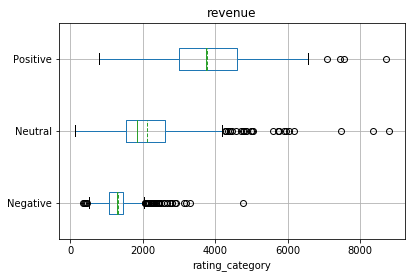


It is possible to check here that the revenue that a customer generate is related to the feedback that he or she gives
about the experience. It will be important to further analyze possible reasons for negative ratings.


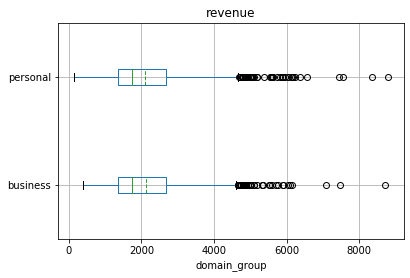


There are no significant difference among personal and business email.


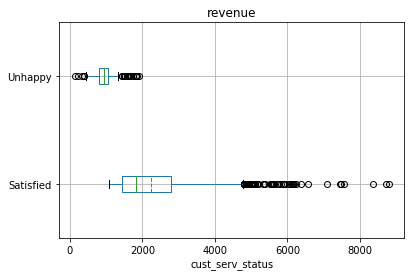


10% of our customers had more than 0.5 contacts per order in average. That 'Unhappy' customer clearly generated
less revenue than a 'Not Unhappy' customer.


In [16]:
# Boxplot for categorical variables: 

# Defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    
    data.boxplot(column = response,
                 by = cat_var,
                 vert = False,
                 patch_artist = False,
                 meanline     = True,
                 showmeans    = True)

    plt.suptitle("")
    plt.show()

# Plotting boxplot to check behavior of categorical variables per group:
categorical_boxplots(response = 'revenue',
                     cat_var  = 'rating_category',
                     data     = app_chef)
print("""
It is possible to check here that the revenue that a customer generate is related to the feedback that he or she gives
about the experience. It will be important to further analyze possible reasons for negative ratings.""")

categorical_boxplots(response = 'revenue',
                     cat_var  = 'domain_group',
                     data     = app_chef)
print("""
There are no significant difference among personal and business email.""")

categorical_boxplots(response = 'revenue',
                     cat_var  = 'cust_serv_status',
                     data     = app_chef)
print("""
10% of our customers had more than 0.5 contacts per order in average. That 'Unhappy' customer clearly generated
less revenue than a 'Not Unhappy' customer.""")

In [17]:
# Creating one binary variable per categorical type: 

# For rating category, we will create a different column per different rank (1 to 5)
# For email domain, we will create one column for 'professional' and another for 'personal'

# Generating binary categorical variables
one_hot_med_meal_rate = pd.get_dummies(app_chef['rating_category'])
one_hot_domain_group = pd.get_dummies(app_chef['domain_group'])
one_hot_cust_serv_status = pd.get_dummies(app_chef['cust_serv_status'])

# Including binary variables in the dataframe
app_chef = app_chef.join([one_hot_med_meal_rate, one_hot_domain_group, one_hot_cust_serv_status])

# Checking existing columns:
print(app_chef.columns)

Index(['revenue', 'cross_sell', 'name', 'email', 'first_name', 'family_name',
       'total_meals', 'unique_meals', 'contact_cust_serv', 'prod_cat_view',
       'avg_time_vis', 'mob_number', 'early_cancel', 'late_cancel',
       'tastes_pref', 'pc_logins', 'mob_logins', 'week_plan', 'early_deliv',
       'late_deliv', 'pack_lock', 'ref_lock', 'follow_rec_pct',
       'avg_prep_time', 'larger_order', 'master_classes', 'med_meal_rate',
       'avg_clicks', 'total_photos', 'm_family_name', 'avg_tckt_order',
       'avg_contact_cust_serv', 'pct_late_deliv', 'pct_early_deliv',
       'share_revenue', 'share_total_meals', 'domain', 'domain_group',
       'rating_category', 'cust_serv_status', 'out_avg_time_hi',
       'out_avg_prep_lo', 'out_avg_prep_hi', 'out_total_meals_hi',
       'out_unique_meals_hi', 'out_cont_cust_serv_lo', 'out_cont_cust_serv_hi',
       'out_canc_bef_noon_hi', 'out_late_deliv_hi', 'out_larg_order_lo',
       'out_larg_order_hi', 'out_avg_clicks_lo', 'out_avg_clicks_

In [18]:
# Ranking correlations with revenue: 
df_corr = app_chef.corr().round(2)
print(df_corr.loc['revenue'].sort_values(ascending = False))

revenue                  1.00
share_revenue            0.99
avg_prep_time            0.64
med_meal_rate            0.61
total_meals              0.60
                         ... 
Unhappy                 -0.36
avg_contact_cust_serv   -0.40
Negative                -0.45
avg_clicks              -0.55
out_canc_bef_noon_hi      NaN
Name: revenue, Length: 70, dtype: float64


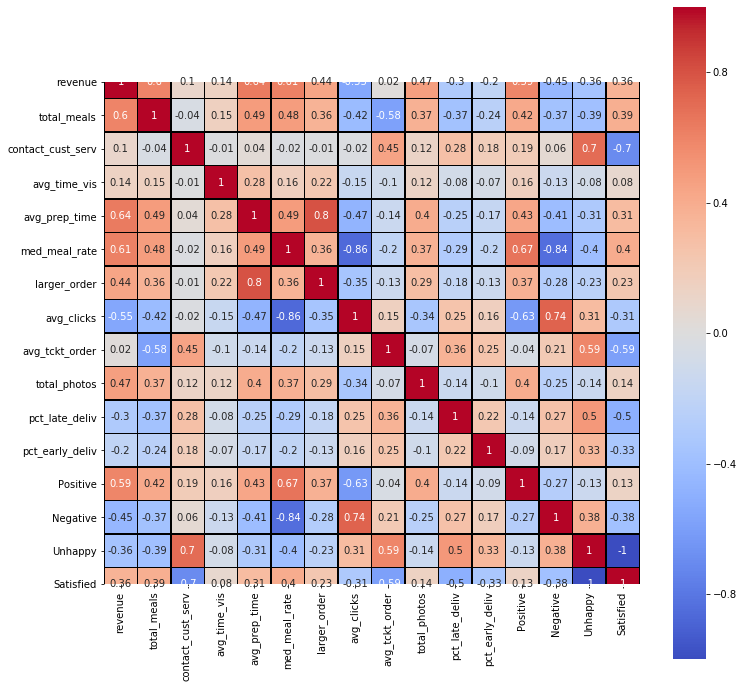

In [19]:
# Plotting correlation matrix: 
fig, ax = plt.subplots(figsize=(12,12))
df_corr2 = df_corr.loc[['revenue','total_meals','contact_cust_serv','avg_time_vis',
                       'avg_prep_time','med_meal_rate','larger_order',
                       'avg_clicks','avg_tckt_order','total_photos',
                       'pct_late_deliv','pct_early_deliv','Positive', 
                        'Negative','Unhappy','Satisfied'], 
                       ['revenue','total_meals','contact_cust_serv','avg_time_vis',
                       'avg_prep_time','med_meal_rate','larger_order',
                       'avg_clicks','avg_tckt_order','total_photos',
                       'pct_late_deliv','pct_early_deliv','Positive', 
                        'Negative', 'Unhappy','Satisfied']]
sns.heatmap(df_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)
plt.show()


<strong> Considerations about correlation </strong>

1. Revenue and rating categories have a strong correlation. If the rating is positive, a positive association. If it is negative, a negative association.
<br><br>
2. 'Average clicks' is an important indicator to measure if the customer is happy or not. It is possible to see a strong inverse association with the ratings and revenue. Higher the amount of average clicks, lower the rating and the revenue.
<br><br>
3. However, it is a good sign if the customer clicks more in photos. There is a significant positive correlation among the count of photos viewed and revenue.
<br><br>
4. There is also a strong correlation among time spent watching preparation videos and revenue. And also among 'largest order size' and time spent watching preparation videos. That means an indication of a higher engagement, represented by the willingness to spend time watching videos of preparation, and revenue. Moreover, also goodwill to make a bigger order.
<br><br>
3. There is a significant association between the percentage of late deliveries and the amount of customer service contact on average per order. That can be a possible reason for the number of contacts, which can drastically impact the levels of revenue if the amount of interactions is higher than 0.5 per order.

***
<h3> Models </h3>

In [20]:
# Creating an excel file with the updated version of the dataset: 
app_chef.to_excel('app_chef_model_version.xlsx',
                 index = False)

In [21]:
# Preparing data for statsmodel: 

# Dropping revenue from the explanatory variable set:
app_chef_explanatory = app_chef.drop(['revenue', 'share_revenue',
                                     'out_revenue_hi','out_share_revenue_hi'], axis = 1)

# Dropping also discrete variables: 
app_chef_explanatory = app_chef_explanatory.drop(['name','email','first_name','family_name',
                                                  'domain', 'domain_group', 'rating_category',
                                                 'cust_serv_status'],axis = 1)

# Formatting explanatory variable for statsmodels:
for val in app_chef_explanatory:
    print(f"app_chef['{val}'] +")

app_chef['cross_sell'] +
app_chef['total_meals'] +
app_chef['unique_meals'] +
app_chef['contact_cust_serv'] +
app_chef['prod_cat_view'] +
app_chef['avg_time_vis'] +
app_chef['mob_number'] +
app_chef['early_cancel'] +
app_chef['late_cancel'] +
app_chef['tastes_pref'] +
app_chef['pc_logins'] +
app_chef['mob_logins'] +
app_chef['week_plan'] +
app_chef['early_deliv'] +
app_chef['late_deliv'] +
app_chef['pack_lock'] +
app_chef['ref_lock'] +
app_chef['follow_rec_pct'] +
app_chef['avg_prep_time'] +
app_chef['larger_order'] +
app_chef['master_classes'] +
app_chef['med_meal_rate'] +
app_chef['avg_clicks'] +
app_chef['total_photos'] +
app_chef['m_family_name'] +
app_chef['avg_tckt_order'] +
app_chef['avg_contact_cust_serv'] +
app_chef['pct_late_deliv'] +
app_chef['pct_early_deliv'] +
app_chef['share_total_meals'] +
app_chef['out_avg_time_hi'] +
app_chef['out_avg_prep_lo'] +
app_chef['out_avg_prep_hi'] +
app_chef['out_total_meals_hi'] +
app_chef['out_unique_meals_hi'] +
app_chef['out_cont_cust_se

In [22]:
# Building statsmodel with all explanatory variables: 

lm_full = smf.ols(formula ="""  app_chef['revenue']~
                                app_chef['cross_sell'] +
                                app_chef['total_meals'] +
                                app_chef['unique_meals'] +
                                app_chef['contact_cust_serv'] +
                                app_chef['prod_cat_view'] +
                                app_chef['avg_time_vis'] +
                                app_chef['mob_number'] +
                                app_chef['early_cancel'] +
                                app_chef['late_cancel'] +
                                app_chef['tastes_pref'] +
                                app_chef['pc_logins'] +
                                app_chef['mob_logins'] +
                                app_chef['week_plan'] +
                                app_chef['early_deliv'] +
                                app_chef['late_deliv'] +
                                app_chef['pack_lock'] +
                                app_chef['ref_lock'] +
                                app_chef['follow_rec_pct'] +
                                app_chef['avg_prep_time'] +
                                app_chef['larger_order'] +
                                app_chef['master_classes'] +
                                app_chef['med_meal_rate'] +
                                app_chef['avg_clicks'] +
                                app_chef['total_photos'] +
                                app_chef['m_family_name'] +
                                app_chef['avg_tckt_order'] +
                                app_chef['avg_contact_cust_serv'] +
                                app_chef['pct_late_deliv'] +
                                app_chef['pct_early_deliv'] +
                                app_chef['share_total_meals'] +
                                app_chef['out_avg_time_hi'] +
                                app_chef['out_avg_prep_lo'] +
                                app_chef['out_avg_prep_hi'] +
                                app_chef['out_total_meals_hi'] +
                                app_chef['out_unique_meals_hi'] +
                                app_chef['out_cont_cust_serv_lo'] +
                                app_chef['out_cont_cust_serv_hi'] +
                                app_chef['out_canc_bef_noon_hi'] +
                                app_chef['out_late_deliv_hi'] +
                                app_chef['out_larg_order_lo'] +
                                app_chef['out_larg_order_hi'] +
                                app_chef['out_avg_clicks_lo'] +
                                app_chef['out_avg_clicks_hi'] +
                                app_chef['out_total_photos_hi'] +
                                app_chef['out_pct_late_deliv_hi'] +
                                app_chef['out_pct_early_deliv_hi'] +
                                app_chef['out_share_total_meals_hi'] +
                                app_chef['thr_total_meals'] +
                                app_chef['thr_unique_meals'] +
                                app_chef['thr_contact_cust_serv'] +
                                app_chef['thr_avg_time_vis'] +
                                app_chef['thr_early_cancel'] +
                                app_chef['thr_late_cancel'] +
                                app_chef['thr_late_deliv'] +
                                app_chef['thr_avg_prep_time'] +
                                app_chef['thr_total_photos'] +
                                app_chef['thr_avg_tckt_order'] +
                                app_chef['thr_pct_late_deliv'] +
                                app_chef['thr_pct_early_deliv'] +
                                app_chef['Negative'] +
                                app_chef['Neutral'] +
                                app_chef['Positive'] +
                                app_chef['business'] +
                                app_chef['personal'] +
                                app_chef['Satisfied'] +
                                app_chef['Unhappy']""", 
                  data = app_chef)

# Fitting the results:
results_full = lm_full.fit()

# Printing summary:
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     app_chef['revenue']   R-squared:                       0.879
Model:                             OLS   Adj. R-squared:                  0.876
Method:                  Least Squares   F-statistic:                     225.4
Date:                 Wed, 11 Mar 2020   Prob (F-statistic):               0.00
Time:                         11:09:38   Log-Likelihood:                -14396.
No. Observations:                 1946   AIC:                         2.892e+04
Df Residuals:                     1884   BIC:                         2.926e+04
Df Model:                           61                                         
Covariance Type:             nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              318.8792    107.604      2.963      0.003     107.844     529.914
app_chef['cross_sell']                 -33.7815     23.238     -1.454      0.146     -79.356      11.793
app_chef['total_meals']                  7.1944      2.410      2.985      0.003       2.468      11.921
app_chef['unique_meals']                -6.6724      4.037     -1.653      0.099     -14.589       1.245
app_chef['contact_cust_serv']          155.6146      8.334     18.671      0.000     139.269     171.960
app_chef['prod_cat_view']                0.7918      3.056      0.259      0.796      -5.202       6.785
app_chef['avg_time_vis']                 0.1259      0.195      0.646      0.519      -0.256       0.508
app_chef['mob_number']                 -33.4893     28.610     -1.171      0.242     -89.600      22.622
app_chef['early_cancel']                 1.4518      6.248      0.232      0.816     -10.802      13.706
app_chef['late_cancel']                 19.1062     22.180      0.861      0.389     -24.393      62.605
app_chef['tastes_pref']                 -3.4011     20.522     -0.166      0.868     -43.649      36.847
app_chef['pc_logins']                    1.6819     15.981      0.105      0.916     -29.660      33.024
app_chef['mob_logins']                 -17.5622     17.638     -0.996      0.320     -52.155      17.030
app_chef['week_plan']                    0.4695      0.685      0.685      0.493      -0.874       1.813
app_chef['early_deliv']                  0.5178      7.601      0.068      0.946     -14.389      15.424
app_chef['late_deliv']                  22.4104      6.300      3.557      0.000      10.054      34.767
app_chef['pack_lock']                    8.5575     21.997      0.389      0.697     -34.583      51.698
app_chef['ref_lock']                    10.9379     33.288      0.329      0.743     -54.348      76.224
app_chef['follow_rec_pct']               0.5667      0.394      1.437      0.151      -0.207       1.340
app_chef['avg_prep_time']                3.3257      0.430      7.733      0.000       2.482       4.169
app_chef['larger_order']               -47.4498     11.243     -4.220      0.000     -69.500     -25.400
app_chef['master_classes']              83.0298     17.034      4.874      0.000      49.623     116.437
app_chef['med_meal_rate']             -188.9264     48.244     -3.916      0.000    -283.544     -94.309
app_chef['avg_clicks']                  -6.8508      8.171     -0.838      0.402     -22.875       9.174
app_chef['total_photos']                 0.2508      0.084      3.003      0.003       0.087       0.415
app_chef['m_family_name']               21.0821     60.262      0.350      0.726     -97.106     139.270
app_chef['avg_tckt_order'] 

Variables with highest p-value removed from the model.

In [23]:
# Selecting explanatory variables and splitting dataset: 

# Dropping all insignificant variables:
app_chef_data   = app_chef_explanatory.drop(['tastes_pref','mob_logins','med_meal_rate','week_plan',
                                             'mob_number','mob_number','pack_lock','ref_lock','pc_logins',
                                             'prod_cat_view','early_cancel','late_cancel','early_deliv',
                                             'follow_rec_pct','pct_early_deliv','avg_clicks','out_late_deliv_hi',
                                             'out_larg_order_lo','out_larg_order_hi','out_avg_clicks_lo',
                                             'out_avg_clicks_hi','out_total_photos_hi','thr_unique_meals',
                                             'thr_early_cancel','thr_late_deliv','thr_avg_prep_time',
                                             'thr_pct_early_deliv', 'out_pct_late_deliv_hi', 
                                             'out_pct_early_deliv_hi','share_total_meals'],
                                    axis = 1)

# Selecting response variable:
app_chef_target = app_chef.loc[:, 'revenue']


# Splitting dataset:
X_train, X_test, y_train, y_test = train_test_split(
            app_chef_data,
            app_chef_target,
            test_size = 0.25,
            random_state = 222)

# Checking training set:
print(X_train.shape)
print(y_train.shape)

# Checking testing set:
print(X_test.shape)
print(y_test.shape)

# Selecting explanatory variables:
x_variables = ['total_meals', 'unique_meals', 'contact_cust_serv', 'avg_time_vis','late_deliv','avg_prep_time',
               'larger_order', 'master_classes','total_photos','thr_total_meals','thr_contact_cust_serv',
               'thr_avg_time_vis','thr_late_cancel','thr_total_photos','Negative','Neutral','Positive',
               'business','personal', 'avg_tckt_order','avg_contact_cust_serv',
               'pct_late_deliv','thr_avg_tckt_order','thr_pct_late_deliv', 'Satisfied', 'Unhappy']

# Creating loop to include variables in the model:
for val in x_variables:
    print(f"app_chef_train['{val}'] +")

(1459, 37)
(1459,)
(487, 37)
(487,)
app_chef_train['total_meals'] +
app_chef_train['unique_meals'] +
app_chef_train['contact_cust_serv'] +
app_chef_train['avg_time_vis'] +
app_chef_train['late_deliv'] +
app_chef_train['avg_prep_time'] +
app_chef_train['larger_order'] +
app_chef_train['master_classes'] +
app_chef_train['total_photos'] +
app_chef_train['thr_total_meals'] +
app_chef_train['thr_contact_cust_serv'] +
app_chef_train['thr_avg_time_vis'] +
app_chef_train['thr_late_cancel'] +
app_chef_train['thr_total_photos'] +
app_chef_train['Negative'] +
app_chef_train['Neutral'] +
app_chef_train['Positive'] +
app_chef_train['business'] +
app_chef_train['personal'] +
app_chef_train['avg_tckt_order'] +
app_chef_train['avg_contact_cust_serv'] +
app_chef_train['pct_late_deliv'] +
app_chef_train['thr_avg_tckt_order'] +
app_chef_train['thr_pct_late_deliv'] +
app_chef_train['Satisfied'] +
app_chef_train['Unhappy'] +


In [24]:
# Statsmodel: 

# Merging x and y train:
app_chef_train = pd.concat([X_train, y_train], axis = 1)


# Building the model with selected explanatory variables:
lm_best = smf.ols(formula =  """revenue ~
                                app_chef_train['total_meals'] +
                                app_chef_train['unique_meals'] +
                                app_chef_train['contact_cust_serv'] +
                                app_chef_train['avg_time_vis'] +
                                app_chef_train['late_deliv'] +
                                app_chef_train['avg_prep_time'] +
                                app_chef_train['larger_order'] +
                                app_chef_train['master_classes'] +
                                app_chef_train['total_photos'] +
                                app_chef_train['thr_total_meals'] +
                                app_chef_train['thr_contact_cust_serv'] +
                                app_chef_train['thr_avg_time_vis'] +
                                app_chef_train['thr_late_cancel'] +
                                app_chef_train['thr_total_photos'] +
                                app_chef_train['Negative'] +
                                app_chef_train['Neutral'] +
                                app_chef_train['Positive'] +
                                app_chef_train['business'] +
                                app_chef_train['personal'] +
                                app_chef_train['avg_tckt_order'] +
                                app_chef_train['avg_contact_cust_serv'] +
                                app_chef_train['pct_late_deliv'] +
                                app_chef_train['thr_avg_tckt_order'] +
                                app_chef_train['thr_pct_late_deliv'] +
                                app_chef_train['Satisfied'] +
                                app_chef_train['Unhappy']""", 
                  data = app_chef_train)


# Fitting model:
results = lm_best.fit()

# Summarizing model:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     463.0
Date:                Wed, 11 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:09:39   Log-Likelihood:                -10766.
No. Observations:                1459   AIC:                         2.158e+04
Df Residuals:                    1435   BIC:                         2.171e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [25]:
# Scikit-learn models: 
# Instantiating a model object considering all models:
lr = LinearRegression()
ridge_model = sklearn.linear_model.Ridge()
lasso_model = sklearn.linear_model.Lasso( )
#ard_model = sklearn.linear_model.ARDRegression()

# Fitting to the training data per model:
lr_fit = lr.fit(X_train, y_train)
ridge_fit  = ridge_model.fit(X_train, y_train)
lasso_fit = lasso_model.fit(X_train,y_train)
#ard_fit = ard_model.fit(X_train,y_train)

# Predicting new data with test dataset:
lr_pred = lr_fit.predict(X_test)
ridge_pred = ridge_fit.predict(X_test)
lasso_pred = lasso_fit.predict(X_test)
#ard_pred = ard_fit.predict(X_test)

# Generating train and test score per model:
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)
lasso_train_score = lasso_model.score(X_train,y_train).round(4)
lasso_test_score  = lasso_model.score(X_test,y_test).round(4)
#ard_train_score = ard_model.score(X_train,y_train).round(4)
#ard_test_score  = ard_model.score(X_test,y_test).round(4)

# Comparing results per model:

print(f"""
Model        Train Score        Test Score
-----        -----------        ----------
OLS          {lr_train_score}              {lr_test_score}
Ridge        {ridge_train_score}             {ridge_test_score}
Lasso        {lasso_train_score}             {lasso_test_score}
""")
# Bayesian ARD {ard_train_score}              {ard_test_score}

print("""
Bayesian ARD model was removed from the analysis due the time it takes to run.
By just removing the '#'s, it is possible to include it again.""")


Model        Train Score        Test Score
-----        -----------        ----------
OLS          0.886              0.8432
Ridge        0.8796             0.8399
Lasso        0.8823             0.844


Bayesian ARD model was removed from the analysis due the time it takes to run.
By just removing the '#'s, it is possible to include it again.


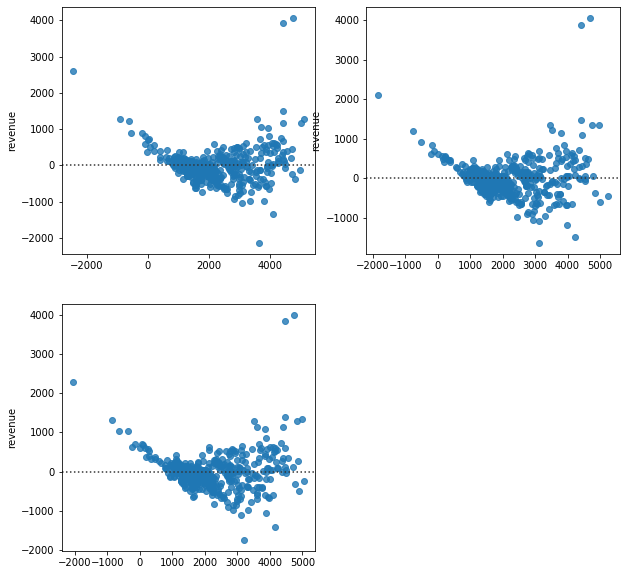

In [26]:
# Plotting residuals per model:
fig, ax = plt.subplots(figsize = (10, 10))

# OLS model:
plt.subplot(2, 2, 1)
sns.residplot(x = lr_pred,  # prediction values
              y = y_test) # actual values

# Ridge model:
plt.subplot(2, 2, 2)
sns.residplot(x = ridge_pred,  # prediction values
              y = y_test) # actual values

# Lasso model:
plt.subplot(2, 2, 3)
sns.residplot(x = lasso_pred,  # prediction values
              y = y_test) # actual values

# Ard model:
# plt.subplot(2, 2, 4)
# sns.residplot(x = ard_pred,  # prediction values
#              y = y_test) # actual values

# displaying the plot
plt.show()

***
<h3> Conclusion </h3>

With this analysis, we could check some important KPIs and how they affect the Apprentice Chef's revenue. It is possible to check association among the engagement of the customer, based on their interactions, and the revenue. 
<br><br>
However, the average amount of clicks is not an indicator of high engagement. On the contrary, it seems that a higher amount of clicks indicates a worse experience with the website because there is a negative association among the number of clicks and satisfaction (measured on ratings) and revenue.
<br><br>
Lastly, the models built estimates the revenue with 0.844 of accuracy, which means that, based on the behavior of future customers, it is possible to predict their revenue. Moreover, it gives business insights on directions to future actions to improve the customer experience, e.g., making an effort to reduce the number of clicks on our website during the customer experience.